In [91]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import xgboost
import graphviz
import lightgbm
import sklearn

In [92]:
ross_df = pd.read_csv('train.csv', low_memory=False)
store_df = pd.read_csv('store.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')


In [93]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [94]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [95]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [96]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


### Looking at store_df and train_df(ross_df) , we can see that the dataframe would make much more sense if the store df is added to the ross_df(train_df)
### Hence, we're going to merge df's


In [97]:
merged_df = ross_df.merge(store_df,how="left",on='Store')

merged_df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [98]:
merged_test_df = test_df.merge(store_df,on='Store',how='left')


<AxesSubplot:>

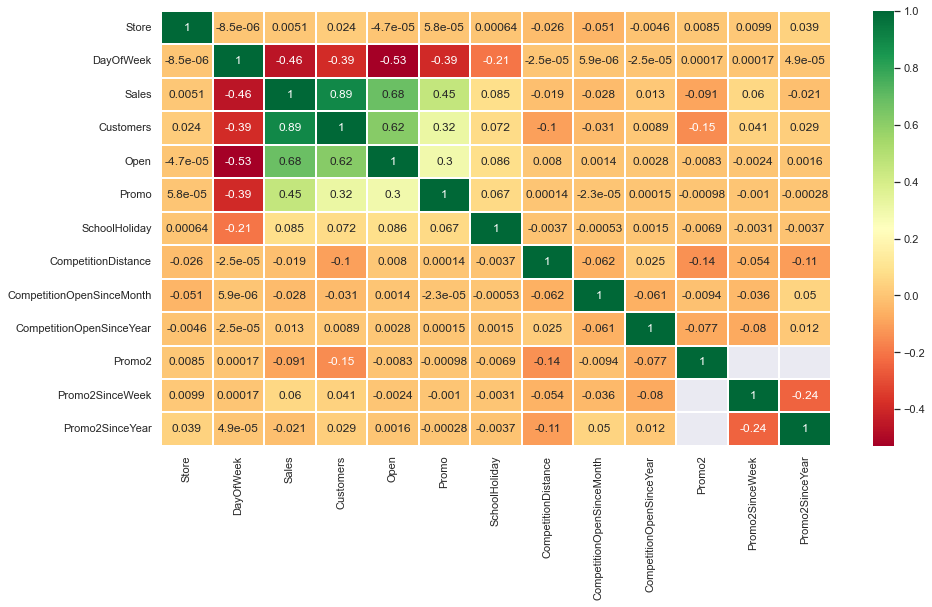

In [99]:
corr = merged_df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap ='RdYlGn',linewidths = 0.01, annot = True)

# PreProcessing And Feature Engineering

In [100]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [101]:
# DATE 
from datetime import date
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week


In [102]:
split_date(merged_df)
split_date(merged_test_df)

merged_df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [103]:
merged_df[merged_df["Open"]==0].Sales.value_counts()

#you can see that when the store is closed , the sales is 0

0    172817
Name: Sales, dtype: int64

In [104]:
# so , the next thing im gonna do is remove the rows with sales as 0 , we're hard coding here (taking it easy on the model)
# IF there is no sales , we can actually remo
merged_df = merged_df[merged_df["Open"]==1].copy()
merged_df.count()

Store                        844392
DayOfWeek                    844392
Date                         844392
Sales                        844392
Customers                    844392
Open                         844392
Promo                        844392
StateHoliday                 844392
SchoolHoliday                844392
StoreType                    844392
Assortment                   844392
CompetitionDistance          842206
CompetitionOpenSinceMonth    575773
CompetitionOpenSinceYear     575773
Promo2                       844392
Promo2SinceWeek              421085
Promo2SinceYear              421085
PromoInterval                421085
Year                         844392
Month                        844392
Day                          844392
WeekOfYear                   844392
dtype: int64

# Competition

### The columns 'CompetitionOpenSinceMonth	CompetitionOpenSinceYear' will not make much sense to the model with the values they currently hold.
### Hence , I'm going to create one column that will have the total number of months since the competitive store has been opened.

In [105]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [106]:
comp_months(merged_df)
comp_months(merged_test_df)

In [107]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000,842206.000000,575773.000000,575773.000000,844392.000000,421085.000000,421085.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,1.0,0.446352,0.193580,5457.979627,7.224879,2008.697747,0.498684,23.253426,2011.754019,2013.831937,5.845738,15.835683,23.646801,41.953548
std,321.731914,1.723689,3104.214680,401.227674,0.0,0.497114,0.395103,7809.437311,3.210144,5.978048,0.499999,14.100569,1.660962,0.777260,3.323931,8.683456,14.389785,65.189741
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,2013.000000,1.000000,1.000000,1.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2013.000000,3.000000,8.000000,11.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,2014.000000,6.000000,16.000000,23.000000,16.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,2014.000000,8.000000,23.000000,35.000000,73.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2015.000000,12.000000,31.000000,52.000000,1386.000000


In [108]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
398530,2014-07-11,710.0,2005.0,9.0,106.0
41962,2015-06-24,11470.0,2009.0,10.0,68.0
571167,2014-02-05,1710.0,NaN,NaN,0.0
112265,2015-04-22,9820.0,NaN,NaN,0.0
562334,2014-02-12,9710.0,2014.0,2.0,0.0
892940,2013-04-22,8080.0,2002.0,12.0,124.0
929819,2013-03-20,550.0,2011.0,7.0,20.0
833474,2013-06-14,1110.0,2009.0,5.0,49.0
209656,2015-01-24,4230.0,2014.0,12.0,1.0
944860,2013-03-06,3370.0,2014.0,10.0,0.0


# Additional Promotion

### adding two more columns, one of them to indicate how long a store has been running Promo2 and another column to show the info if a new round of Promo2 starts in the current month

In [109]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [110]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [111]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
397565,2014-07-12,1,2012.0,40.0,"Jan,Apr,Jul,Oct",21.245902,1
875403,2013-05-08,1,2012.0,22.0,"Mar,Jun,Sept,Dec",11.311475,0
491714,2014-04-17,1,2013.0,31.0,"Feb,May,Aug,Nov",8.557377,0
941922,2013-03-09,0,NaN,NaN,NaN,0.000000,0
657853,2013-11-19,0,NaN,NaN,NaN,0.000000,0
9161,2015-07-23,1,2011.0,14.0,"Jan,Apr,Jul,Oct",51.672131,1
592002,2014-01-17,1,2013.0,5.0,"Feb,May,Aug,Nov",11.540984,0
809408,2013-07-06,0,NaN,NaN,NaN,0.000000,0
571208,2014-02-05,0,NaN,NaN,NaN,0.000000,0
22600,2015-07-11,0,NaN,NaN,NaN,0.000000,0


In [112]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [113]:
merged_df.shape[1] #number of columns

25

# Input and Target Columns

In [114]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [115]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [116]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()


test_inputs = merged_test_df[input_cols].copy()

In [117]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.131148,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.901639,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.000000,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,1,1,2013,1,0,0.000000,0
1016827,733,2,0,a,1,b,b,860.0,159.0,1,1,2013,1,0,0.000000,0
1016863,769,2,0,a,1,b,b,840.0,0.0,1,1,2013,1,1,1.213115,1
1017042,948,2,0,a,1,b,b,1430.0,0.0,1,1,2013,1,0,0.000000,0


In [118]:
test_inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,4,1,0,0,c,a,1270.0,84.0,17,9,2015,38,0,0.000000,0
1,3,4,1,0,0,a,a,14130.0,105.0,17,9,2015,38,1,53.508197,0
2,7,4,1,0,0,a,c,24000.0,29.0,17,9,2015,38,0,0.000000,0
3,8,4,1,0,0,a,a,7520.0,11.0,17,9,2015,38,0,0.000000,0
4,9,4,1,0,0,a,c,2030.0,181.0,17,9,2015,38,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,0,0,0,a,a,1900.0,14.0,1,8,2015,31,1,24.000000,0
41084,1112,6,0,0,0,c,c,1880.0,112.0,1,8,2015,31,0,0.000000,0
41085,1113,6,0,0,0,a,c,9260.0,0.0,1,8,2015,31,0,0.000000,0
41086,1114,6,0,0,0,a,c,870.0,0.0,1,8,2015,31,0,0.000000,0


In [119]:
inputs.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

## Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.

In [120]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [121]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [122]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

## 'CompetitionDistance' values could be Nan because there might not be any competitive stores close by
## to do : get rid of the null values , DO NOT put 0 , which could mean a competitive store is very close by
## instead of saying there is no competition nearby , you could insert a large number - that could mean a competition still present ,but far away


In [123]:
# find max distance
max_distance = inputs.CompetitionDistance.max()
max_distance

# fill the null values with the maximum distance value
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)



In [124]:
test_inputs[numeric_cols].isna().sum() #checking for nAn values in test_inputs

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

### Imp Note to remember : When you replace a nAn value , be aware of what value you put in ,instead of randomly putting 0 or min or max values , do a quick check of what that value could mean. 


# Scale Numeric Values 

In [125]:
test_inputs[numeric_cols].describe()
#before scaling 

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.0,41088.000000
mean,555.899533,0.395833,0.443487,5253.936916,48.872542,0.580607,23.511294,0.127434,13.520833,8.354167,2015.0,34.645833
std,320.274496,0.489035,0.496802,7985.045338,75.277424,0.493466,25.076537,0.333462,8.448450,0.478266,0.0,2.015481
min,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,2015.0,31.000000
25%,279.750000,0.000000,0.000000,720.000000,0.000000,0.000000,0.000000,0.000000,6.750000,8.000000,2015.0,33.000000
50%,553.500000,0.000000,0.000000,2450.000000,28.000000,1.000000,17.049180,0.000000,12.500000,8.000000,2015.0,35.000000
75%,832.250000,1.000000,1.000000,6540.000000,83.000000,1.000000,46.163934,0.000000,19.250000,9.000000,2015.0,36.000000
max,1115.000000,1.000000,1.000000,75860.000000,1388.000000,1.000000,73.606557,1.000000,31.000000,9.000000,2015.0,38.000000


In [126]:
from sklearn.preprocessing import MinMaxScaler


In [127]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [128]:
test_inputs[numeric_cols].describe()
#after scaling 

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.0,41088.000000
mean,555.899533,0.395833,0.443487,5253.936916,48.872542,0.580607,23.511294,0.127434,13.520833,8.354167,2015.0,34.645833
std,320.274496,0.489035,0.496802,7985.045338,75.277424,0.493466,25.076537,0.333462,8.448450,0.478266,0.0,2.015481
min,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,2015.0,31.000000
25%,279.750000,0.000000,0.000000,720.000000,0.000000,0.000000,0.000000,0.000000,6.750000,8.000000,2015.0,33.000000
50%,553.500000,0.000000,0.000000,2450.000000,28.000000,1.000000,17.049180,0.000000,12.500000,8.000000,2015.0,35.000000
75%,832.250000,1.000000,1.000000,6540.000000,83.000000,1.000000,46.163934,0.000000,19.250000,9.000000,2015.0,36.000000
max,1115.000000,1.000000,1.000000,75860.000000,1388.000000,1.000000,73.606557,1.000000,31.000000,9.000000,2015.0,38.000000


In [129]:
from sklearn.preprocessing import OneHotEncoder

In [130]:
test_inputs[categorical_cols]  = test_inputs[categorical_cols].astype(str)
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

C:\Users\sandy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [131]:
test_inputs[categorical_cols].dtypes

DayOfWeek       object
StateHoliday    object
StoreType       object
Assortment      object
dtype: object

In [132]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [133]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# GRADIENT BOOSTING

### •	GBM model Calculates the average value of the target column and uses that as the initial prediction for every input 
### •	Difference between the prediction and the target values are calculated (Now , irrespective any loss function that you use , the prediction is going to be bad)
### •	A decision tree (limited depth) is created to predict the only the residuals for each input.
### •	The predictions from the decision trees are not directly used(this will result in over fitting) , instead they are scaled using the ‘learning rate’ parameter
### •	These ‘SCALED’ predictions from the decision tree are added to the previous predictions of the decision tree to get a new and improved results (new predictions)
### •	All the above steps are repeated to create a new decision tree , each of which are trained to find/predict the residuals from the previous predictions
## Why the term “GRADIENT BOOSTING” ?
### The word ‘gradient’ is used because each decision tree is created/trained for the purpose of reducing the loss of the previous iteration (similar to gradient descent ).
### And ‘boosting’ because new models being created to improve the results of the previous model.


# XGB Training 

In [134]:
from xgboost import XGBRegressor

In [135]:
?XGBRegressor

Init signature:
XGBRegressor(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : typing.Union[str, typing.Callable[[numpy.ndarray, numpy.ndarray], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: Optional[str]
        

In [136]:
model = XGBRegressor(random_state = 42, n_jobs = -1 ,n_estimators = 20,max_depth =4)


In [137]:
targets.dtypes

dtype('int64')

In [138]:
X = X.astype(float)
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  float64
 1   Promo                844392 non-null  float64
 2   SchoolHoliday        844392 non-null  float64
 3   CompetitionDistance  844392 non-null  float64
 4   CompetitionOpen      844392 non-null  float64
 5   Promo2               844392 non-null  float64
 6   Promo2Open           844392 non-null  float64
 7   IsPromo2Month        844392 non-null  float64
 8   Day                  844392 non-null  float64
 9   Month                844392 non-null  float64
 10  Year                 844392 non-null  float64
 11  WeekOfYear           844392 non-null  float64
 12  DayOfWeek_1          844392 non-null  float64
 13  DayOfWeek_2          844392 non-null  float64
 14  DayOfWeek_3          844392 non-null  float64
 15  DayOfWeek_4     

In [139]:
%%time
model.fit(X, targets)


Wall time: 3.08 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# PREDICTION 

In [140]:
preds = model.predict(X)

# EVALUATION

In [141]:
from sklearn.metrics import mean_squared_error

def rmse(a,b) :
    return mean_squared_error(a,b,squared=False)

In [142]:
rmse(preds,targets)

2377.752008804669

(array([ 498., 4211., 3564., 1195.,  339.,  126.,   38.,   18.,    5.,
           6.]),
 array([    0. ,  3090.3,  6180.6,  9270.9, 12361.2, 15451.5, 18541.8,
        21632.1, 24722.4, 27812.7, 30903. ]),
 <BarContainer object of 10 artists>)

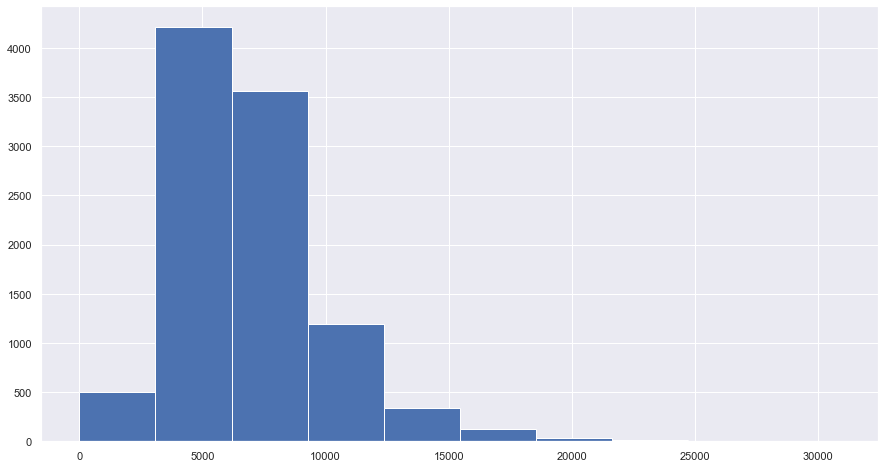

In [143]:
# to find if the values are way off, we can make a histogram of the df.sales column
import matplotlib.pyplot as plt
plt.hist(merged_df.Sales.sample(10000))

# VISUALIZATION

In [144]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,30


<AxesSubplot:>

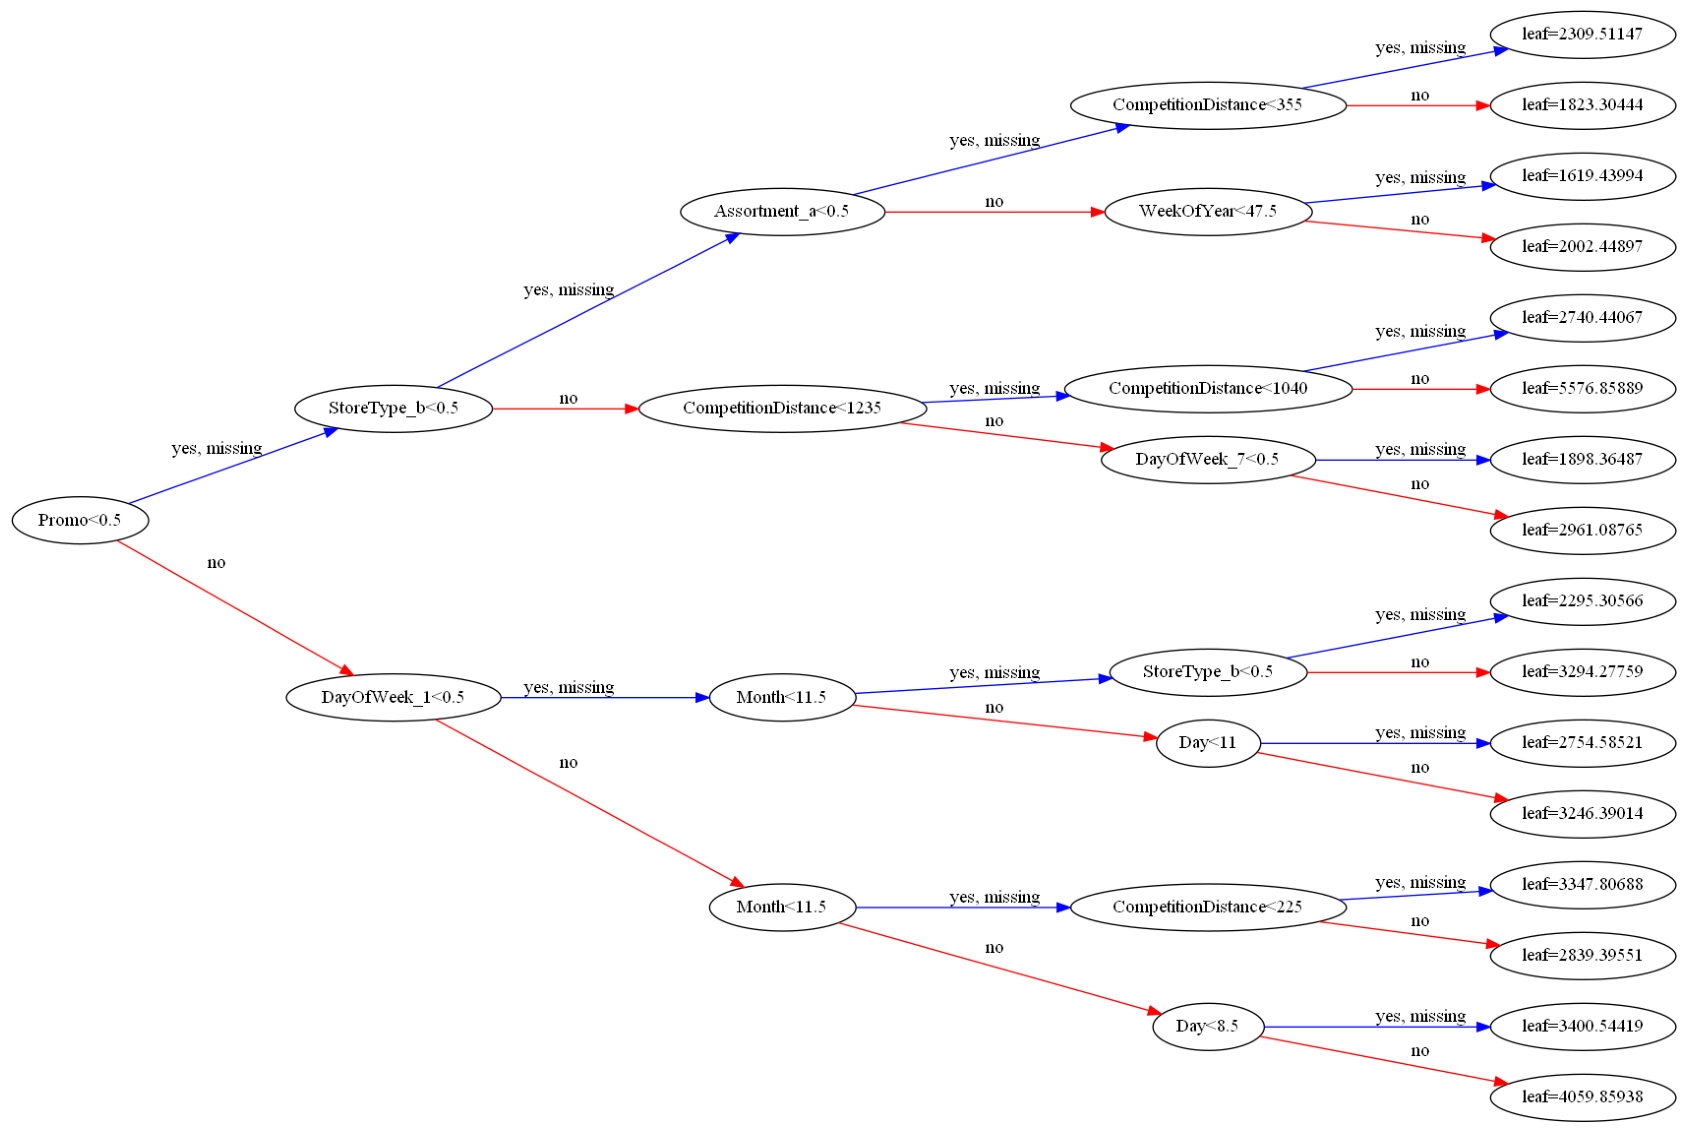

In [145]:
plot_tree(model, rankdir='LR',num_trees=0)

<AxesSubplot:>

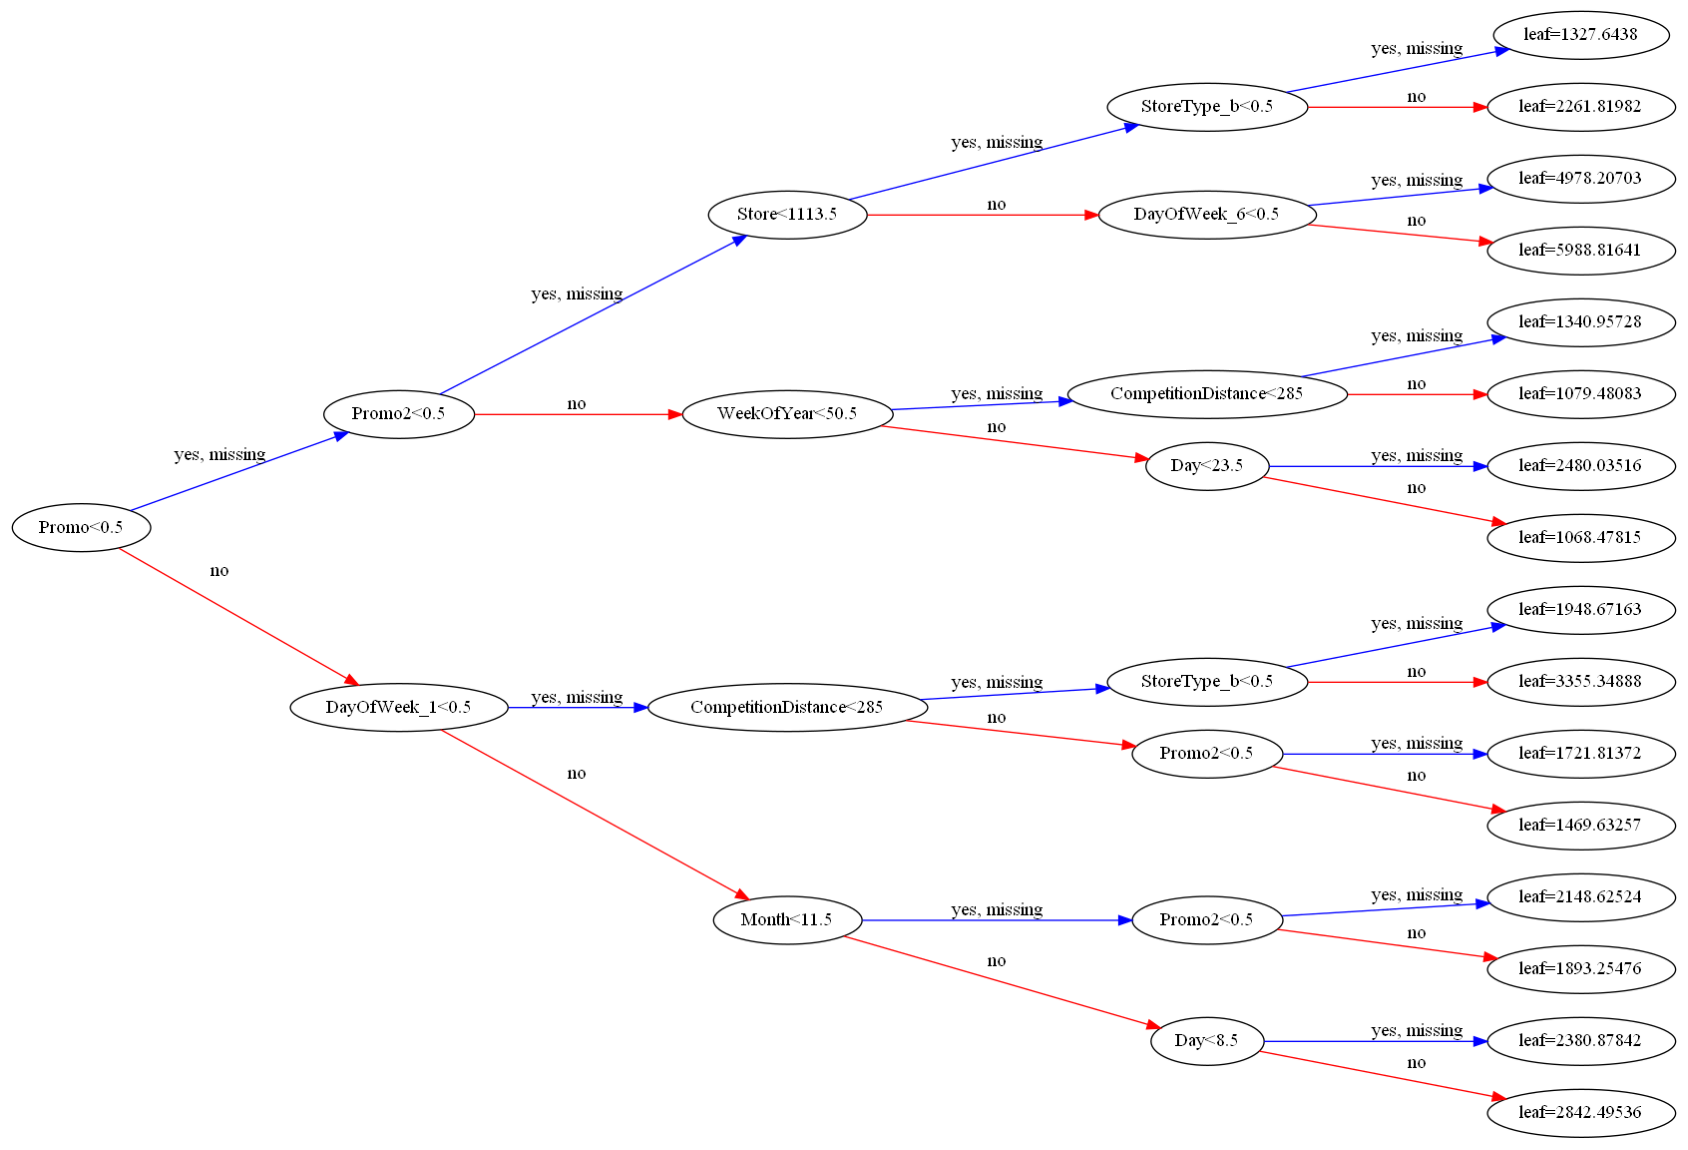

In [146]:
plot_tree(model, rankdir='LR',num_trees=1)

In [147]:
num_of_trees = model.get_booster().get_dump()

In [148]:
len(num_of_trees)

20

# FEATURE IMPORTANCE

In [149]:
importance_df = pd.DataFrame({
    'feature' : X.columns,
    'importance' : model.feature_importances_
})

In [150]:
importance_df

,feature,importance
0,Store,0.038119
1,Promo,0.317473
2,SchoolHoliday,0.031932
3,CompetitionDistance,0.045053
4,CompetitionOpen,0.014757
5,Promo2,0.063986
6,Promo2Open,0.021257
7,IsPromo2Month,0.006145
8,Day,0.033209
9,Month,0.038493


In [151]:
importance_df = importance_df.sort_values('importance',ascending=False)
importance_df

,feature,importance
1,Promo,0.317473
24,StoreType_b,0.086472
12,DayOfWeek_1,0.082269
5,Promo2,0.063986
3,CompetitionDistance,0.045053
29,Assortment_c,0.040226
27,Assortment_a,0.038759
9,Month,0.038493
0,Store,0.038119
8,Day,0.033209


<Figure size 720x432 with 0 Axes>

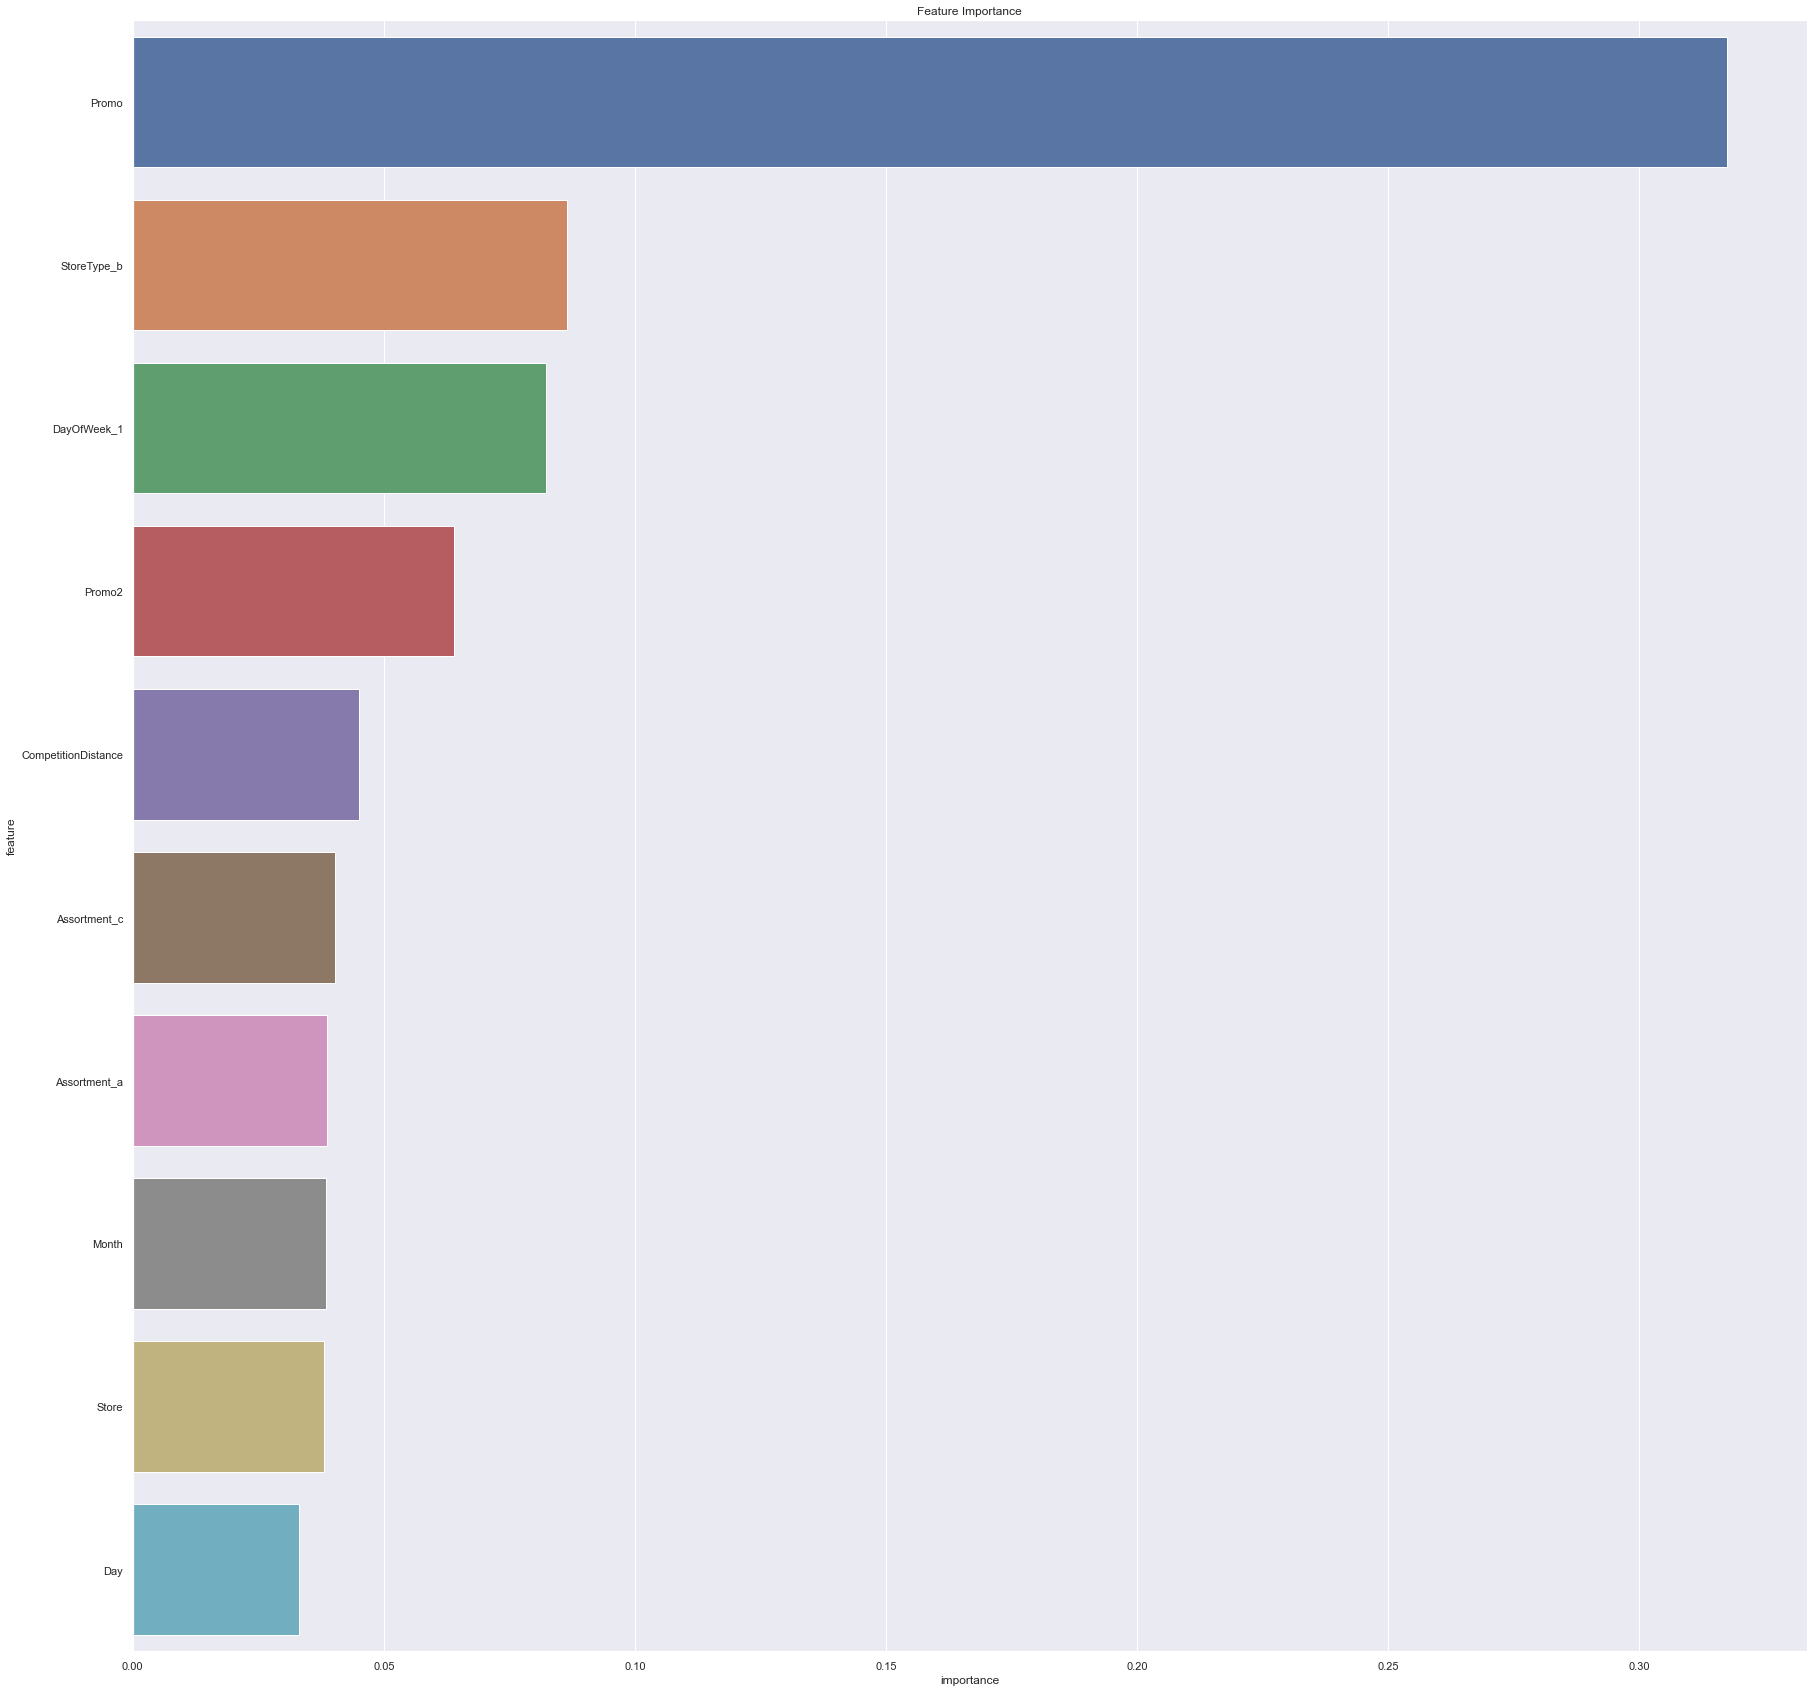

<Figure size 720x432 with 0 Axes>

In [152]:
import seaborn as sns
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10),y= 'feature',x = 'importance')
plt.figure(figsize=(10,6))

# K-Fold Cross Validation

### important point to note : this type of cross validation works only for smaller dataset

In [153]:
from sklearn.model_selection import KFold

In [154]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse


# a simple helper function to train the model for different k - folds

In [155]:
kfold = KFold(n_splits=5)

In [156]:
print(kfold.split(X))

<generator object _BaseKFold.split at 0x000001C583DEE2E0>


In [157]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2352.216448531526, Validation RMSE: 2424.6228916973314
Train RMSE: 2406.709513789309, Validation RMSE: 2451.9646038059277
Train RMSE: 2365.7354745443067, Validation RMSE: 2336.984157073758
Train RMSE: 2366.4732092777763, Validation RMSE: 2460.8995475901697
Train RMSE: 2379.3752997474626, Validation RMSE: 2440.1991736842497


In [158]:
# k fold is usually done when the dataset is small 

# Hyperparameter tuning and Regularization

In [159]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [162]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

## n_estimators : The number of trees to be created. More trees = greater capacity of the model.

In [163]:
test_params(n_estimators=10)

Train RMSE: 2361.2686605532977, Validation RMSE: 2353.8137474394243


In [164]:
test_params(n_estimators=30)

Train RMSE: 1886.2236407803487, Validation RMSE: 1885.6245555777493


In [165]:
test_params(n_estimators=100)

Train RMSE: 1211.3097728450177, Validation RMSE: 1212.5780408489845


In [166]:
test_params(n_estimators=240)

Train RMSE: 899.9441441158348, Validation RMSE: 915.4497570312278


# max_depth : As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set

In [167]:
test_params(max_depth=2)

Train RMSE: 2365.6357871344444, Validation RMSE: 2365.3145299830585


In [168]:
test_params(max_depth=5)

Train RMSE: 1430.6866751563834, Validation RMSE: 1429.077940907704


In [169]:
test_params(max_depth=10)

Train RMSE: 684.100133036133, Validation RMSE: 779.6837592298621


# learning_rate : The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [170]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 5043.925475180025, Validation RMSE: 5040.197447192601


In [171]:
test_params(n_estimators=50, learning_rate=0.1)

Train RMSE: 2218.40214814757, Validation RMSE: 2215.565655486502


In [172]:
test_params(n_estimators=50, learning_rate=0.3)

Train RMSE: 1596.3034008014208, Validation RMSE: 1598.1680294100206


In [173]:
test_params(n_estimators=50, learning_rate=0.9)

Train RMSE: 1125.8648192688759, Validation RMSE: 1141.257745106449


In [174]:
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE: 1168.863793376275, Validation RMSE: 1173.838671557403


# BOOSTER  : Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using booster.

In [176]:
test_params(booster='gblinear')

Train RMSE: 2729.8754769658435, Validation RMSE: 2725.2097868645164


In [177]:
#It kinda shows us that a linear model is not well suited for this dataset.

# Let's make some Predictions

In [178]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [179]:
model.fit(X, targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
test_preds = model.predict(X_test)

In [181]:
submission_df['Sales']  = test_preds

 ### Recall, however, if if the store is not open, then the sales must be 0. Thus, wherever the value of Open in the test set is 0, we can set the sales to 0. Also, there some missing values for Open in the test set. We'll replace them with 1 (open).
 

In [183]:
test_df.Open.isna().sum()

11

In [184]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [186]:
submission_df.head(20)

,Id,Sales
0,1,4189.133789
1,2,8435.160156
2,3,9271.698242
3,4,6578.035645
4,5,7376.332031
5,6,5725.959961
6,7,7380.112793
7,8,7937.885254
8,9,5410.813477
9,10,5467.329102
